In [1]:
import tensorflow as tf
import os
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import dill as dpickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline
print(os.getcwd())

from google.colab import drive
drive.mount('/content/gdrive')
!ls

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	     test_body_vecs.npy  test_title_vecs.npy  train_labels.npy
sample_data  test_labels.npy	 train_body_vecs.npy  train_title_vecs.npy


In [2]:
!cp gdrive/My\ Drive/ASE\ Project/*.npy .
!ls
test_body_vecs = np.load('test_body_vecs.npy')
test_body_df = pd.DataFrame(test_body_vecs)
print(test_body_df.shape)

gdrive	     test_body_vecs.npy  test_title_vecs.npy  train_labels.npy
sample_data  test_labels.npy	 train_body_vecs.npy  train_title_vecs.npy
(330203, 110)


In [3]:
train_title_vecs = np.load('train_title_vecs.npy')
train_body_vecs = np.load('train_body_vecs.npy')
test_title_vecs = np.load('test_title_vecs.npy')
test_body_vecs = np.load('test_body_vecs.npy')
train_label_vecs = np.load('train_labels.npy')
test_label_vecs = np.load('test_labels.npy')

train_title_df = pd.DataFrame(train_title_vecs)
train_body_df = pd.DataFrame(train_body_vecs)
test_title_df = pd.DataFrame(test_title_vecs)
test_body_df = pd.DataFrame(test_body_vecs)
train_label_df = pd.DataFrame(train_label_vecs)
test_label_df = pd.DataFrame(test_label_vecs)

train_df = pd.concat([train_title_df, train_body_df], axis = 1)
test_df = pd.concat([test_title_df, test_body_df], axis = 1)

print(train_df.shape)
print(test_df.shape)

(1871144, 120)
(330203, 120)


In [4]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

train_df = pd.concat([train_df, train_label_df], axis=1)
test_df = pd.concat([test_df, test_label_df], axis=1)

train_df = shuffle(train_df)
test_df = shuffle(test_df)

train_label_df = train_df.iloc[:, -1]
test_label_df = test_df.iloc[:, -1]
train_df = train_df.iloc[:, :-1]
test_df = test_df.iloc[:, :-1]

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df.head(75000))
test_scaled = scaler.transform(test_df.head(75000))

print(train_scaled.shape)
print(test_scaled.shape)
print(train_label_df.shape)
print(test_label_df.shape)

(75000, 120)
(75000, 120)
(1871144,)
(330203,)


In [5]:
params_grid = [{'kernel': ['rbf'],'C': [1]}]

train_label_df = train_label_df.head(75000)
test_label_df = test_label_df.head(75000)
print(train_label_df.shape)
print(test_label_df.shape)


(75000,)
(75000,)


In [6]:
train_label = train_label_df.values
test_label = test_label_df.values

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(train_scaled, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(test_scaled)

Best score for training data: 0.5441866666666667 

Best C: 1 

Best Kernel: rbf 

Best Gamma: auto_deprecated 



In [8]:
print(confusion_matrix(test_label_df,Y_pred))

[[18031 15419     0]
 [11528 22694     1]
 [ 4035  3291     1]]


In [9]:
print(classification_report(test_label_df,Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     33450
           1       0.55      0.66      0.60     34223
           2       0.50      0.00      0.00      7327

    accuracy                           0.54     75000
   macro avg       0.53      0.40      0.38     75000
weighted avg       0.54      0.54      0.51     75000



In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_label_df,Y_pred))

0.5430133333333333


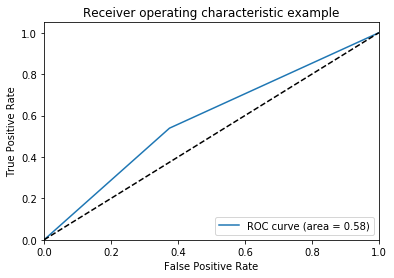

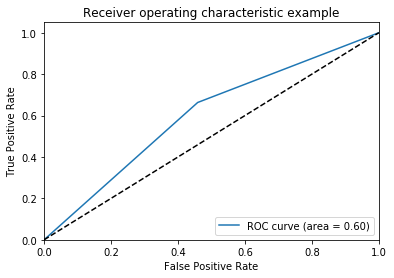

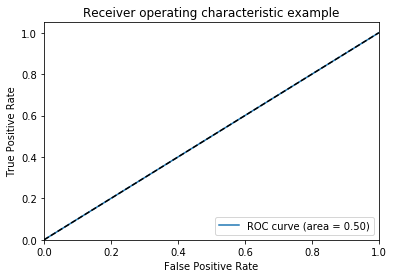

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = 3
test_label_df_binary = label_binarize(test_label_df, classes=[0,1,2])
Y_pred_binary = label_binarize(Y_pred, classes=[0,1,2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label_df_binary[:, i], Y_pred_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# create plot
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# save figure
# plt.savefig('roc_curve.png', dpi=200)

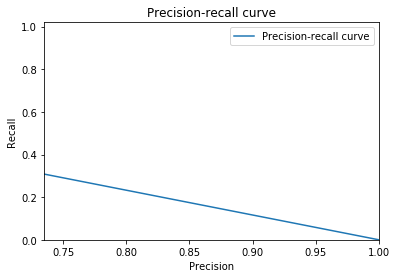

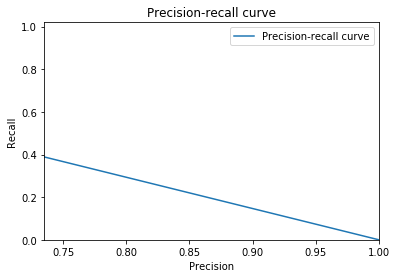

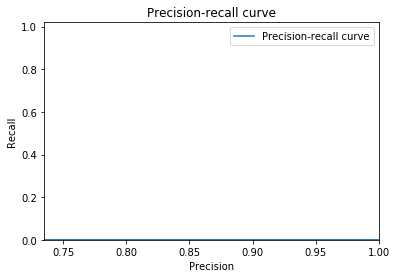

In [13]:
from sklearn.metrics import precision_recall_curve 

precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_label_df_binary[:, i], Y_pred_binary[:, i])

# create plot
for i in range(n_classes):
    plt.figure()
    plt.plot(precision[i], recall[i], label='Precision-recall curve')
    _ = plt.xlabel('Precision')
    _ = plt.ylabel('Recall')
    _ = plt.title('Precision-recall curve')
    _ = plt.xlim([0.735, 1])
    _ = plt.ylim([0, 1.02])
    _ = plt.legend(loc="upper right")
    plt.show()
    
# save figure
#plt.savefig('precision_recall.png', dpi=200)